In [ ]:
import sqlite3
import pandas as pd

# 1. 가상 DB 연결 (메모리)
conn = sqlite3.connect(':memory:')
cur = conn.cursor()

# 2. 테이블 생성 및 데이터 입력 (Day 6 데이터)
cur.execute('CREATE TABLE users (user_id VARCHAR(10), name VARCHAR(20), age INTEGER, city VARCHAR(20))')
cur.execute('CREATE TABLE orders (order_id VARCHAR(10), user_id VARCHAR(10), order_date DATE, amount INTEGER)')

users_data = [('User_A', '철수', 30, '서울'), ('User_B', '영희', 25, '부산'), ('User_C', '민수', 40, '서울'), ('User_E', '지수', 22, '대구')]
orders_data = [('O001', 'User_A', '2024-01-01', 50000), ('O002', 'User_A', '2024-01-03', 30000), 
               ('O003', 'User_B', '2023-05-01', 100000), ('O004', 'User_B', '2023-06-15', 20000), 
               ('O005', 'User_C', '2024-01-02', 5000), ('O006', 'User_C', '2024-01-03', 10000), ('O008', 'User_A', '2024-01-05', 70000)]

cur.executemany('INSERT INTO users VALUES (?, ?, ?, ?)', users_data)
cur.executemany('INSERT INTO orders VALUES (?, ?, ?, ?)', orders_data)
conn.commit()

# 3. 데이터 가져오기 (LEFT JOIN)
sql_fetch = """
SELECT u.user_id, u.name, u.age, u.city, o.amount
FROM users as u
LEFT JOIN orders as o ON u.user_id = o.user_id
"""
df = pd.read_sql(sql_fetch, conn)

# 4. 결측치 처리 (주문 없는 사람 0원 처리)
df['amount'] = df['amount'].fillna(0)

print("✅ Day 7 실습 준비 완료!")
df.head()

✅ Day 7 실습 준비 완료!


,user_id,name,age,city,amount
0,User_A,철수,30,서울,30000.0
1,User_A,철수,30,서울,50000.0
2,User_A,철수,30,서울,70000.0
3,User_B,영희,25,부산,20000.0
4,User_B,영희,25,부산,100000.0


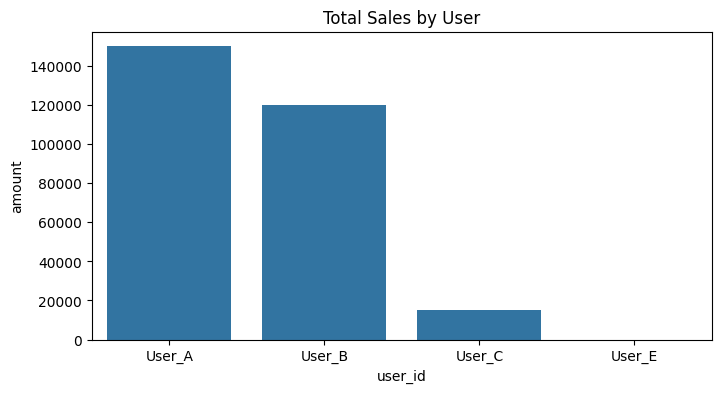

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='user_id', y='amount', estimator=sum, errorbar=None)
plt.title("Total Sales by User")
plt.show()

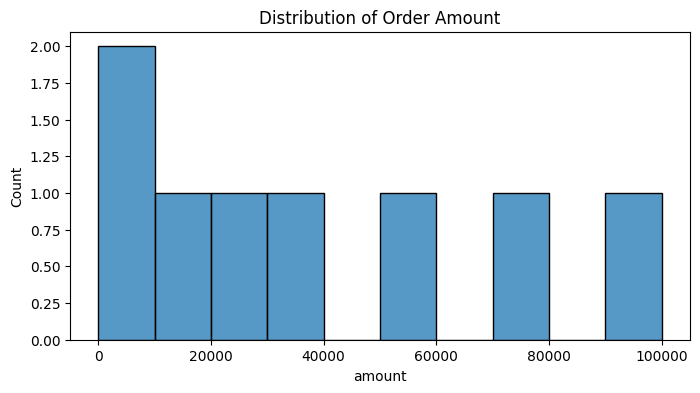

In [9]:
plt.figure(figsize=(8, 4))
#sns.histplot(data=df[df['amount'] > 0], x='amount', bins=10)
sns.histplot(data=df, x='amount', binwidth=10000)
plt.title("Distribution of Order Amount")
plt.show()

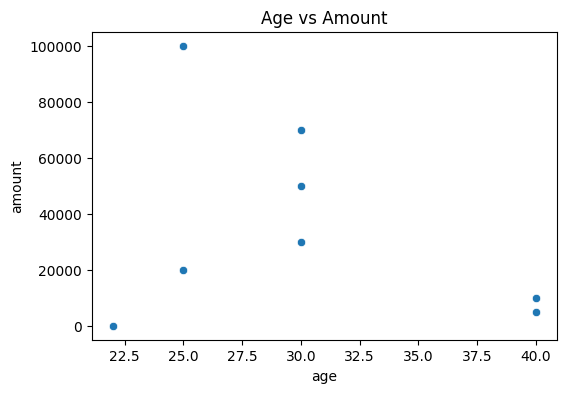

In [4]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='age', y='amount')
plt.title("Age vs Amount")
plt.show()

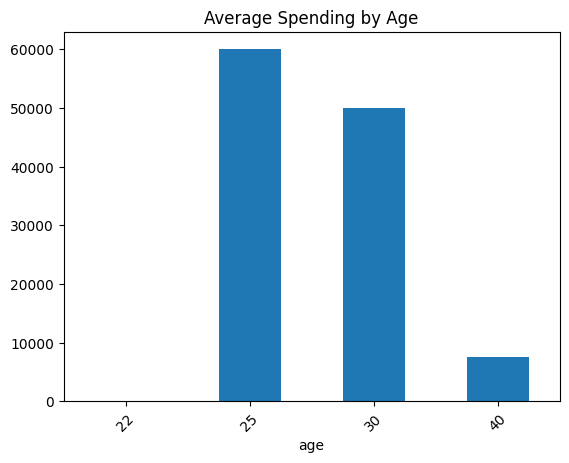

In [12]:
age_group = df.groupby('age')['amount'].mean()

#print("--- 연령별 평균 구매액 ---")
#print(age_group)

age_group.plot(kind='bar', title = 'Average Spending by Age', rot=45)
plt.show()